# Crop simulation

Doing imports 

In [2]:
%matplotlib inline
#%matplotlib notebook
import sys
import pcse
import pandas as pd
import numpy as np
import matplotlib
matplotlib.style.use("ggplot")
import matplotlib.pyplot as plt
print("This notebook was built with:")
print(f"python version: {sys.version}")
print(f"PCSE version: {pcse.__version__}")

This notebook was built with:
python version: 3.10.16 | packaged by Anaconda, Inc. | (main, Dec 11 2024, 16:19:12) [MSC v.1929 64 bit (AMD64)]
PCSE version: 6.0.9


## Weather & Solar data 

### 1. Transform the data into the right units


| Identifier | Parameter   | Description                              | From Unit  | To Unit           | Dataset |
|------------|-------------|------------------------------------------|------------|-------------------|---------|
| TXK        | TMAX        | Daily maximum temperature                | °C         | °C                | KL      |
| TNK        | TMIN        | Daily minimum temperature                | °C         | °C                | KL      |
| VPM        | VAP         | Mean daily vapour pressure               | hPa        | kPa               | KL      |
| FM         | WIND        | Mean daily wind speed at 2 m above ground level | m/s        | m/s       | KL      |
| RSK        | RAIN        | Precipitation                            | mm         | mm   | KL      |
| FG_STRAHL  | IRRAD       | Daily global radiation                   | $J/cm^2$    | $kJ/m^{-2}$ | Solar   |
| SHK_TAG    | SNOWDEPTH   | Depth of snow cover (optional)           | cm         | cm                | KL      |

##### Climate and Solar data

In [13]:
# Read the text file into a DataFrame
data_bremen_kl = pd.read_csv('data_kl/bremen_daily_kl/tageswerte_KL_00691_18900101_20231231_hist/produkt_klima_tag_18900101_20231231_00691.txt', delimiter=';', skipfooter=1, engine='python')
data_chemnitz_kl = pd.read_csv('data_kl/chemnitz_daily_kl/tageswerte_KL_00853_18820101_20231231_hist/produkt_klima_tag_18820101_20231231_00853.txt', delimiter=';', skipfooter=1, engine='python')

data_bremen_solar = pd.read_csv('data_solar/bremen/tageswerte_ST_00691_row/produkt_st_tag_20090101_20250331_00691.txt', delimiter=';', skipfooter=1, engine='python')
data_chemnitz_solar = pd.read_csv('data_solar/chemnitz/tageswerte_ST_00853_row/produkt_st_tag_19810101_20250331_00853.txt', delimiter=';', skipfooter=1, engine='python')

# Convert units -> mm to cm, ensuring column names are stripped of extra spaces
data_bremen_kl.columns = data_bremen_kl.columns.str.strip()
data_chemnitz_kl.columns = data_chemnitz_kl.columns.str.strip()

# Replace -999 with NaN
data_bremen_kl.replace(-999, np.nan, inplace=True)
data_chemnitz_kl.replace(-999, np.nan, inplace=True)

data_bremen_solar.replace(-999, np.nan, inplace=True)
data_chemnitz_solar.replace(-999, np.nan, inplace=True)


##### Find the rows without NaNs


In [14]:
# Create a boolean mask for rows without NaN values
mask_bremen = data_bremen_solar.notna().all(axis=1)
mask_chemnitz = data_chemnitz_solar.notna().all(axis=1)

# Filter and print the rows without NaN values
data_bremen_solar_cleaned = data_bremen_solar[mask_bremen]
data_chemnitz_solar_cleaned = data_chemnitz_solar[mask_chemnitz]

print("Bremen Solar Data without NaNs:")
print(data_bremen_solar_cleaned)

print("Chemnitz Solar Data without NaNs:")
print(data_chemnitz_solar_cleaned)

Bremen Solar Data without NaNs:
Empty DataFrame
Columns: [STATIONS_ID, MESS_DATUM, QN_592, ATMO_STRAHL, FD_STRAHL, FG_STRAHL, SD_STRAHL, eor]
Index: []
Chemnitz Solar Data without NaNs:
Empty DataFrame
Columns: [STATIONS_ID, MESS_DATUM, QN_592, ATMO_STRAHL, FD_STRAHL, FG_STRAHL, SD_STRAHL, eor]
Index: []


### 2. Transform to PCSE data format

In [15]:
# Map and transform the data to PCSE format
data_bremen_pcse = pd.DataFrame({
    #'DAY': pd.to_datetime(data_bremen_kl['MESS_DATUM'], format='%Y%m%d'),
    'DAY': data_bremen_kl['MESS_DATUM'],
    'IRRAD': data_bremen_solar['FG_STRAHL'] * 10,  # Convert J/cm² to kJ/m²
    'TMIN': data_bremen_kl['TNK'],  # Example: map to minimum temperature
    'TMAX': data_bremen_kl['TXK'],  # Example: map to maximum temperature
    'VAP': data_bremen_kl['VPM'],  # Example: map to vapor pressure
    'WIND': data_bremen_kl['FM'],  # Assuming this is the wind speed
    'RAIN': data_bremen_kl['RSK'] / 10,  # Convert mm to cm
    'SNOW': np.nan # -999  # Fill snow depth with NaN
})
#print(data_bremen_pcse)

#data_bremen_pcse.replace(np.nan, int(-999), inplace=True)
#data_bremen_pcse['IRRAD'] = data_chemnitz_pcse['IRRAD'].astype(int)

In [16]:
# Map and transform the data to PCSE format
data_chemnitz_pcse = pd.DataFrame({
    #'DAY': pd.to_datetime(data_chemnitz_kl['MESS_DATUM'], format='%Y%m%d'),
    'DAY': data_chemnitz_kl['MESS_DATUM'],
    'IRRAD': data_chemnitz_solar['FG_STRAHL'] * 10000,  # Convert J/cm² to J/m²
    'TMIN': data_chemnitz_kl['TNK'],  # Example: map to minimum temperature
    'TMAX': data_chemnitz_kl['TXK'],  # Example: map to maximum temperature
    'VAP': data_chemnitz_kl['VPM'],  # Example: map to vapor pressure
    'WIND': data_chemnitz_kl['FM'],  # Assuming this is the wind speed
    'RAIN': data_chemnitz_kl['RSK'] / 10,  # Convert mm to cm if needed
    'SNOW': np.nan  # Fill snow depth with NaN
})

#print(data_chemnitz_pcse)

#data_chemnitz_pcse.replace(np.nan, int(-999), inplace=True)
#data_chemnitz_pcse['your_column_name'].replace(np.nan, -999, inplace=True)
#data_chemnitz_pcse['IRRAD'] = data_chemnitz_pcse['IRRAD'].astype(int)


##### Write to CSV file without site characteristics / meta data

In [ ]:
# Write to CSV file without site characteristics / meta data
#data_chemnitz_pcse.to_csv('CSV_chemnitz_pcse_ohneMeta.csv', index=False, na_rep='NaN')
#data_bremen_pcse.to_csv('CSV_bremen_pcse_ohneMeta.csv', index=False, na_rep='NaN')

### 3. Insert site characteristics into the CSV

In [ ]:
# Site characteristics as a string
site_characteristics = """## Site Characteristics
Country     = 'Germany'
Station     = 'Chemnitz'
Description = 'Observed data from Station Chemnitz'
Source      = 'Your Data Source'
Contact     = 'Your Contact'
Longitude = 12.92; Latitude = 50.83; Elevation = 300; AngstromA = 0.25; AngstromB = 0.50; HasSunshine = False
## Daily weather observations (missing values are NaN)
"""

# Filter the data for a specific date range (e.g., from 2009-01-01 to 2023-12-31)
#csv_data = data_chemnitz_pcse[data_chemnitz_pcse['DAY'] >= 20090101]

# Convert DataFrame to CSV string
#csv_data = csv_data.to_csv(index=False, na_rep='NaN')

# Combine site characteristics and CSV data
#full_csv_content = site_characteristics + csv_data

# Write to CSV file
#with open('chemnitz_withMeta.csv', 'w', newline='') as f:
    #f.write(full_csv_content)
    #f.write(csv_data)

#print("CSV file with site characteristics created.")

CSV file with site characteristics created.


In [ ]:
# Define the CSV content
csv_content = """## Site Characteristics
Country='Germany'; Station='Chemnitz'; Description='Observed data'; Source='Your Source'; Contact='Your Contact'; Longitude=12.92; Latitude=50.83; Elevation=300; AngstromA=0.25; AngstromB=0.50; HasSunshine=False
## Daily weather observations (missing values are NaN)
DAY,IRRAD,TMIN,TMAX,VAP,WIND,RAIN,SNOW
20090101,100,0,-5,1,2,0,0
20090102,150,1,-4,2,3,0,0
"""

# Write to the CSV file
#with open('chemnitz_minimal_example.csv', 'w', newline='') as f:
    #f.write(csv_content)

#print("CSV file 'chemnitz_minimal_example.csv' created successfully.")

CSV file 'chemnitz_minimal_example.csv' created successfully.


In [ ]:
from pcse.input import CSVWeatherDataProvider
import csv

# Load the weather data provider
# Ensure the weather file is correctly formatted for PCSE
#weatherfile = "chemnitz_withMeta.csv"
#weatherfile = "chemnitz_minimal_example.csv"

# Open the CSV file and read its contents
#with open(weatherfile, 'r') as csvfile:
#    reader = csv.reader(csvfile)
#    for row in reader:
#        print(row)  # Print each row as a list

#weatherdataprovider = CSVWeatherDataProvider(weatherfile)

# Debugging: Inspect the first and last date
#print(f"First date: {weatherdataprovider.first_date}")
#print(f"Last date: {weatherdataprovider.last_date}")

#print(weatherdataprovider)

['## Site Characteristics']
["Country='Germany'; Station='Chemnitz'; Description='Observed data'; Source='Your Source'; Contact='Your Contact'; Longitude=12.92; Latitude=50.83; Elevation=300; AngstromA=0.25; AngstromB=0.50; HasSunshine=False"]
['## Daily weather observations (missing values are NaN)']
['DAY', 'IRRAD', 'TMIN', 'TMAX', 'VAP', 'WIND', 'RAIN', 'SNOW']
['20090101', '100', '0', '-5', '1', '2', '0', '0']
['20090102', '150', '1', '-4', '2', '3', '0', '0']
First date: None
Last date: None


TypeError: unsupported operand type(s) for -: 'NoneType' and 'NoneType'

### Trying with excel

In [ ]:
import pandas as pd
import numpy as np

# Create a DataFrame for the metadata in a structured format
meta_bremen = pd.DataFrame({
    'Country': ["Germany"],
    'Station': ["Chemnitz"],
    'Description': ["Observed data from Station Chemnitz"],
    'Source': ["Your Data Source"],
    'Contact': ["Your Contact"],
    'Longitude': ["12.92"],  # Float
    'Latitude': ["50.83"],    # Float
    'Elevation': ["300"],      # Float
    'AngstromA': ["0.25"],     # Float
    'AngstromB': ["0.50"],     # Float
    'HasSunshine': [False]   # Boolean
})

# Map and transform the data to PCSE format
data_bremen_pcse = pd.DataFrame({
    'DAY': data_bremen_kl['MESS_DATUM'],
    'IRRAD': data_bremen_solar['FG_STRAHL'] * 10000,  # Convert J/cm² to J/m²
    'TMIN': data_bremen_kl['TNK'],  # Minimum temperature
    'TMAX': data_bremen_kl['TXK'],  # Maximum temperature
    'VAP': data_bremen_kl['VPM'],  # Vapor pressure
    'WIND': data_bremen_kl['FM'],  # Wind speed
    'RAIN': data_bremen_kl['RSK'] / 10,  # Convert mm to cm
    'SNOW': np.nan  # Fill snow depth with NaN
})

# Path to save the Excel file
excel_file_path = 'TEST_BREMEN.xlsx'

# Create an Excel writer object
""" with pd.ExcelWriter(excel_file_path, engine='openpyxl') as writer:
    # Write the metadata to the first sheet
    meta_bremen.to_excel(writer, sheet_name='Data', index=False, header=True, startrow=0)  # Write metadata with header

    # Write the data starting from row 12 (index 11)
    data_bremen_pcse.to_excel(writer, sheet_name='Data', index=False, header=True, startrow=11)  # Write data with header

print(f"Excel file '{excel_file_path}' created successfully with metadata and data.") """

Excel file 'TEST_BREMEN.xlsx' created successfully with metadata and data.


## With manually created CSV

In [3]:
import numpy as np
from pcse.input import CSVWeatherDataProvider
weatherdataproviderChem2009_100 = CSVWeatherDataProvider("data_PCSE_prepd/DATA_Chemnitz_2009_prepd_PCSE.csv")
weatherdataproviderChem2018_100 = CSVWeatherDataProvider("data_PCSE_prepd/DATA_Chemnitz_2018_prepd_PCSE.csv")
weatherdataproviderChem2020_100 = CSVWeatherDataProvider("data_PCSE_prepd/DATA_Chemnitz_2020_prepd_PCSE.csv")
weatherdataproviderBre2009_100 = CSVWeatherDataProvider("data_PCSE_prepd/DATA_Bremen_2009_prepd_PCSE.csv")
weatherdataproviderBre2018_100 = CSVWeatherDataProvider("data_PCSE_prepd/DATA_Bremen_2018_prepd_PCSE.csv")
weatherdataproviderBre2020_100 = CSVWeatherDataProvider("data_PCSE_prepd/DATA_Bremen_2020_prepd_PCSE.csv")

weatherdataproviderChem2009_70 = CSVWeatherDataProvider("data_PCSE_prepd/DATA_Chemnitz_2009_prepd_PCSEx70.csv")
weatherdataproviderChem2018_70 = CSVWeatherDataProvider("data_PCSE_prepd/DATA_Chemnitz_2018_prepd_PCSEx70.csv")
weatherdataproviderChem2020_70 = CSVWeatherDataProvider("data_PCSE_prepd/DATA_Chemnitz_2020_prepd_PCSEx70.csv")
weatherdataproviderBre2009_70 = CSVWeatherDataProvider("data_PCSE_prepd/DATA_Bremen_2009_prepd_PCSEx70.csv")
weatherdataproviderBre2018_70 = CSVWeatherDataProvider("data_PCSE_prepd/DATA_Bremen_2018_prepd_PCSEx70.csv")
weatherdataproviderBre2020_70 = CSVWeatherDataProvider("data_PCSE_prepd/DATA_Bremen_2020_prepd_PCSEx70.csv")

weatherdataproviderChem2009_50 = CSVWeatherDataProvider("data_PCSE_prepd/DATA_Chemnitz_2009_prepd_PCSEx50.csv")
weatherdataproviderChem2018_50 = CSVWeatherDataProvider("data_PCSE_prepd/DATA_Chemnitz_2018_prepd_PCSEx50.csv")
weatherdataproviderChem2020_50 = CSVWeatherDataProvider("data_PCSE_prepd/DATA_Chemnitz_2020_prepd_PCSEx50.csv")
weatherdataproviderBre2009_50 = CSVWeatherDataProvider("data_PCSE_prepd/DATA_Bremen_2009_prepd_PCSEx50.csv")
weatherdataproviderBre2018_50 = CSVWeatherDataProvider("data_PCSE_prepd/DATA_Bremen_2018_prepd_PCSEx50.csv")
weatherdataproviderBre2020_50 = CSVWeatherDataProvider("data_PCSE_prepd/DATA_Bremen_2020_prepd_PCSEx50.csv")

#create List, format: place-shading-year
weatherlist = [  [   [weatherdataproviderBre2009_100,weatherdataproviderBre2018_100,weatherdataproviderBre2020_100],
      [weatherdataproviderBre2009_70,weatherdataproviderBre2018_70,weatherdataproviderBre2020_70],
      [weatherdataproviderBre2009_50,weatherdataproviderBre2018_50,weatherdataproviderBre2020_50]
  ],
  [ 
      [weatherdataproviderChem2009_100,weatherdataproviderChem2018_100,weatherdataproviderChem2020_100],
      [weatherdataproviderChem2009_70,weatherdataproviderChem2018_70,weatherdataproviderChem2020_70],
      [weatherdataproviderChem2009_50,weatherdataproviderChem2018_50,weatherdataproviderChem2020_50]
  ]
]

# weatherlist = [[[weatherdataproviderBre2009_100,weatherdataproviderBre2020_100]],
#                [[weatherdataproviderChem2009_100,weatherdataproviderChem2020_100]]
#               ]
print(np.shape(weatherlist))

(2, 3, 3)


## Crop, Soil and Agro Data

In [4]:
from pcse.input import YAMLCropDataProvider
from pcse.models import Wofost72_PP
from pcse.util import DummySoilDataProvider
from pcse.input import WOFOST72SiteDataProvider
from pcse.base import ParameterProvider
from pcse.input import YAMLAgroManagementReader

"""load crop file https://github.com/ajwdewit/WOFOST_crop_parameters"""
cropd = YAMLCropDataProvider(Wofost72_PP) #https://github.com/ajwdewit/WOFOST_crop_parameters
#cropd.print_crops_varieties() #every kind of plant in this library

#list of selected crops and variety, insert new plants here
croplist = [["sweetpotato","Sweetpotato_VanHeemst_1988"],["wheat","Winter_wheat_101"]]

"""load dummy soil file https://pcse.readthedocs.io/en/stable/code.html#pcse.util.DummySoilDataProvider"""
soild = DummySoilDataProvider()

"""load some standard site; https://pcse.readthedocs.io/en/stable/code.html#wofost72sitedataprovider"""
sited = WOFOST72SiteDataProvider(WAV=10) #WAV = initial soil moisture

"""put everything together with ParameterProvider"""
parameters = ParameterProvider(cropdata=cropd, soildata=soild, sitedata=sited)

"""agro file"""
agroswepot2009 = YAMLAgroManagementReader("agro/agro_sweetpotato_2009.yaml")
agroswepot2018 = YAMLAgroManagementReader("agro/agro_sweetpotato_2018.yaml")
agroswepot2020 = YAMLAgroManagementReader("agro/agro_sweetpotato_2020.yaml")
agrowheat2009 = YAMLAgroManagementReader("agro/agro_wheat_2009.yaml")
agrowheat2018 = YAMLAgroManagementReader("agro/agro_wheat_2018.yaml")
agrowheat2020 = YAMLAgroManagementReader("agro/agro_wheat_2020.yaml")
#other agros can be added here

#add agros to list: plant-year
# [agropot2009,agropot2020],[agroOTHERPLANT2009,agroOTHERPLANT2020],...]
agrolist = [[agroswepot2009,agroswepot2018,agroswepot2020],[agrowheat2009,agrowheat2018,agrowheat2020]]
print(np.array(agrolist).shape)

Using this class from pcse.util is deprecated, use pcse.input.DummySoilDataProvider
(2, 3, 1)


### Running the model with the given files

In [5]:
from pcse.models import Wofost72_WLP_CWB
#wofsim_results list format: plant-place-shading-year
# [ [   [
#           [plant1_2009_Bre_100%,plant1_Bre_2020_100%],[plant1_2009_Bre_70%,plant1_Bre_2020_70%],[plant1_2009_Bre_50%,plant1_Bre_2020_50%]]
#       ],
#       [
#           [plant1_2009_Chem_100%,plant1_Chem_2020_100%],[plant1_2009_Chem_70%,plant1_Chem_2020_70%],[plant1_2009_Chem_50%,plant1_Chem_2020_50%]]
#       ]
#   ],
#   [   [
#           [plant2_2009_Bre_100%,plant2_Bre_2020_100%],[plant2_2009_Bre_70%,plant2_Bre_2020_70%],[plant2_2009_Bre_50%,plant2_Bre_2020_50%]]
#       ],
#       [
#           [plant2_2009_Chem_100%,plant2_Chem_2020_100%],[plant2_2009_Chem_70%,plant2_Chem_2020_70%],[plant2_2009_Chem_50%,plant2_Chem_2020_50%]]
#       ]
#   ]
# ]

# lila: 2 einträge: potato und wheat
# blau: 2 einträge: bremen und chemnitz
# gelb: 3 einträge: 100%, 70%, 50%
# 3 einträge in gelb: 2009, 2018, 2020

wofsim_results = [[[[0,0,0],[0,0,0],[0,0,0]],[[0,0,0],[0,0,0],[0,0,0]]],[[[0,0,0],[0,0,0],[0,0,0]],[[0,0,0],[0,0,0],[0,0,0]]]]
"""
print(np.shape(wofsim_results))
print(len(croplist))
print(len(weatherlist))
print(len(weatherlist[0]))
print(len(weatherlist[0][0]))
"""
for i in range(len(croplist)):
    cropd.set_active_crop(croplist[i][0], croplist[i][1]) #select crop
    for a in range(len(weatherlist)):
        for b in range(len(weatherlist[a])):
            for c in range(len(weatherlist[a][b])):
                wofsim = Wofost72_WLP_CWB(parameters, weatherlist[a][b][c], agrolist[i][c]) #choose correct part from lists
                wofsim.run_till_terminate()

                wofsim_results[i][a][b][c] = pd.DataFrame(wofsim.get_output())              #store results in dataframe
                wofsim_results[i][a][b][c] = wofsim_results[i][a][b][c].set_index("day")    #change index

print(np.shape(wofsim_results))
print(wofsim_results[0][0][0][0].head())

(2, 2, 3, 3, 154, 12)
                 DVS       LAI       TAGP  TWSO       TWLV       TWST  \
day                                                                     
2009-04-01  0.000000  0.046800  65.000000   0.0  39.000000  26.000000   
2009-04-02  0.000000  0.046800  65.620012   0.0  39.372007  26.248005   
2009-04-03  0.002404  0.048678  68.228239   0.0  40.936943  27.291295   
2009-04-04  0.009135  0.051366  71.955923   0.0  43.173554  28.782369   
2009-04-05  0.009135  0.051366  74.260430   0.0  44.556258  29.704172   

                 TWRT       TRA    RD        SM      WWLOW  RFTRA  
day                                                                
2009-04-01  35.000000  0.004108  10.0  0.400000  22.000000    1.0  
2009-04-02  35.333853  0.006643  11.2  0.286288  21.922750    1.0  
2009-04-03  36.738282  0.007380  12.4  0.267054  21.821360    1.0  
2009-04-04  38.740553  0.003542  13.6  0.251911  21.729454    1.0  
2009-04-05  39.969853  0.004801  14.8  0.243017  21.693688

## Barplots

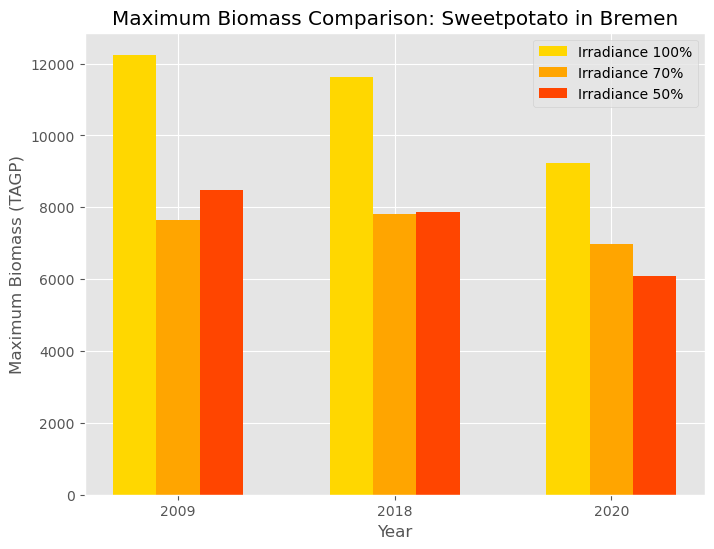

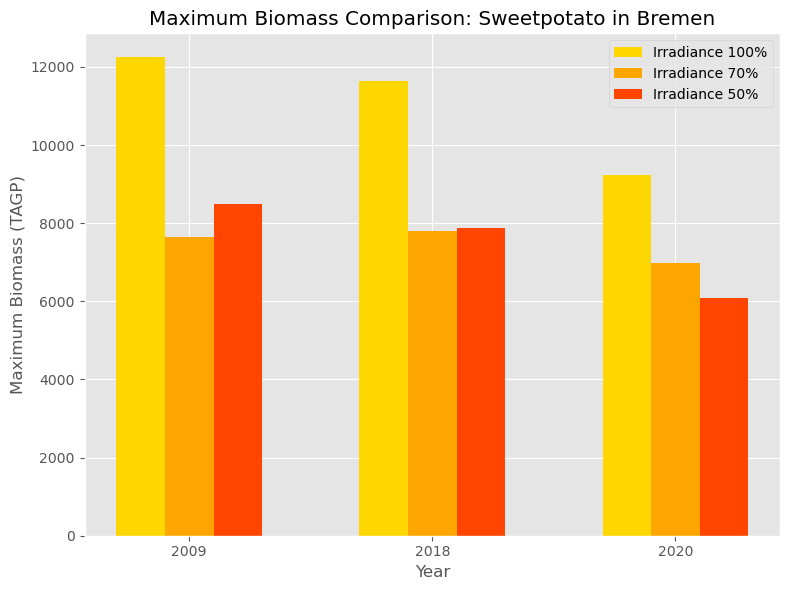

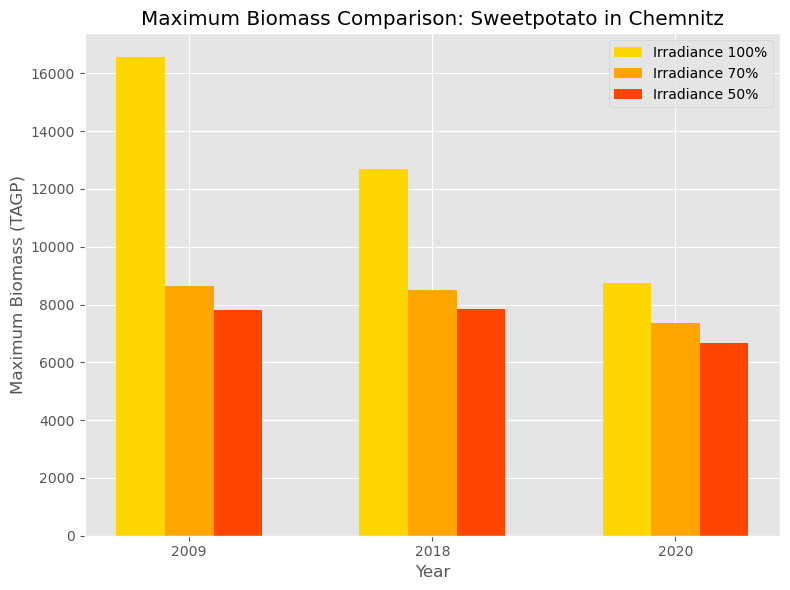

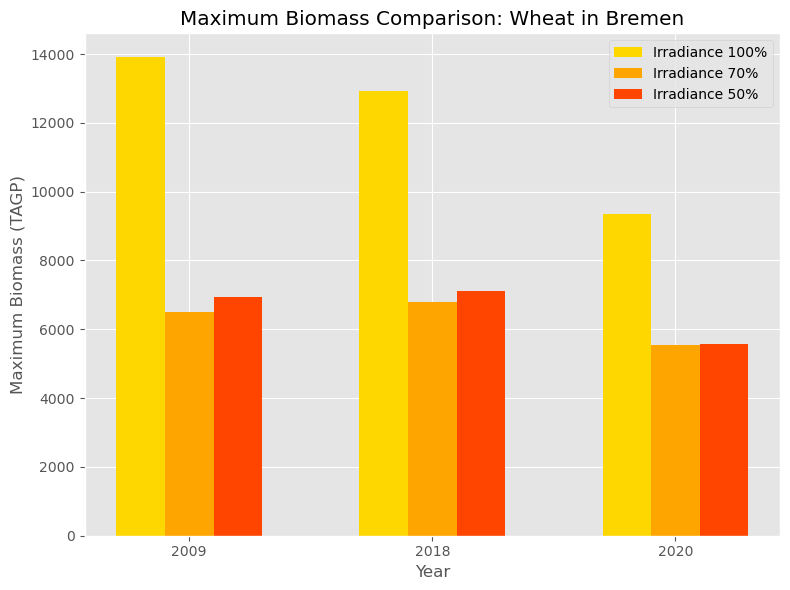

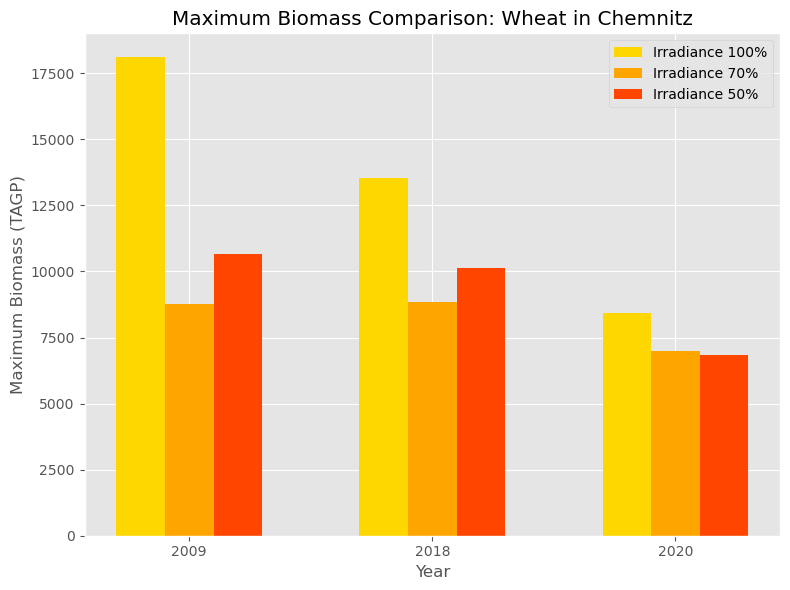

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# TWSO

# Prepare labels for the plots
locations = ["Bremen", "Chemnitz"]
crops = ["Sweetpotato", "Wheat"]
irradiance_levels = ["100%", "70%", "50%"]
years = ["2009", "2018", "2020"]

# Define colors for the irradiance levels
irradiance_colors = ["#FFD700", "#FFA500", "#FF4500"]  # Bright yellow to dark red

# Define high-contrast colors for the irradiance levels
#irradiance_colors = ["#0072B2", "#009E73", "#CC79A7"]  # Blue, Green, Purple

# Iterate through crops and locations
for crop_idx, crop_name in enumerate(crops):
    for loc_idx, location_name in enumerate(locations):
        # Prepare data for the barplot
        biomass_values = []  # Store the maximum TAGP value for each year and irradiance level
        for irr_idx in range(len(irradiance_levels)):
            for year_idx in range(len(years)):
                # Extract the DataFrame for the current crop, location, irradiance, and year
                df = wofsim_results[crop_idx][loc_idx][irr_idx][year_idx]
                # Get the maximum value of TAGP
                max_value = df["TAGP"].max()
                biomass_values.append(max_value)

        # Reshape the biomass values into a 2D array (years x irradiance levels)
        biomass_values = np.array(biomass_values).reshape(len(years), len(irradiance_levels))

        # Create the barplot
        fig, ax = plt.subplots(figsize=(8, 6))
        bar_width = 0.2
        x = np.arange(len(years))  # Positions for the years

        # Plot bars for each irradiance level
        for irr_idx, irr_label in enumerate(irradiance_levels):
            ax.bar(x + irr_idx * bar_width, biomass_values[:, irr_idx], bar_width, 
                   label=f"Irradiance {irr_label}", color=irradiance_colors[irr_idx])

        # Set plot labels and title
        ax.set_xlabel("Year")
        ax.set_ylabel("Maximum Biomass (TAGP)")
        ax.set_title(f"Maximum Biomass Comparison: {crop_name} in {location_name}")
        ax.set_xticks(x + bar_width)
        ax.set_xticklabels(years)
        ax.legend()

        # Save the plot in the "plots/barplots" folder
        filename = f"Barplot_{crop_name}_{location_name}.png"
        plt.tight_layout()
        plt.savefig(filename, dpi=300)
        plt.show()

### Barplots with temp and precipitation

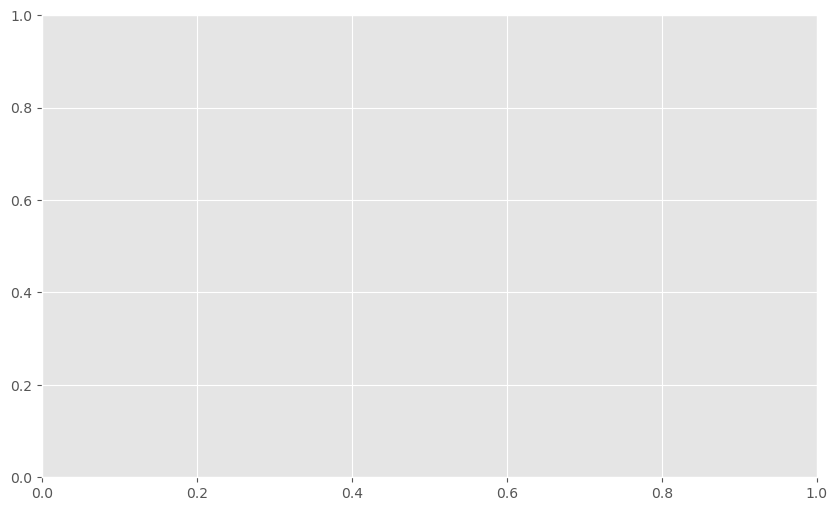

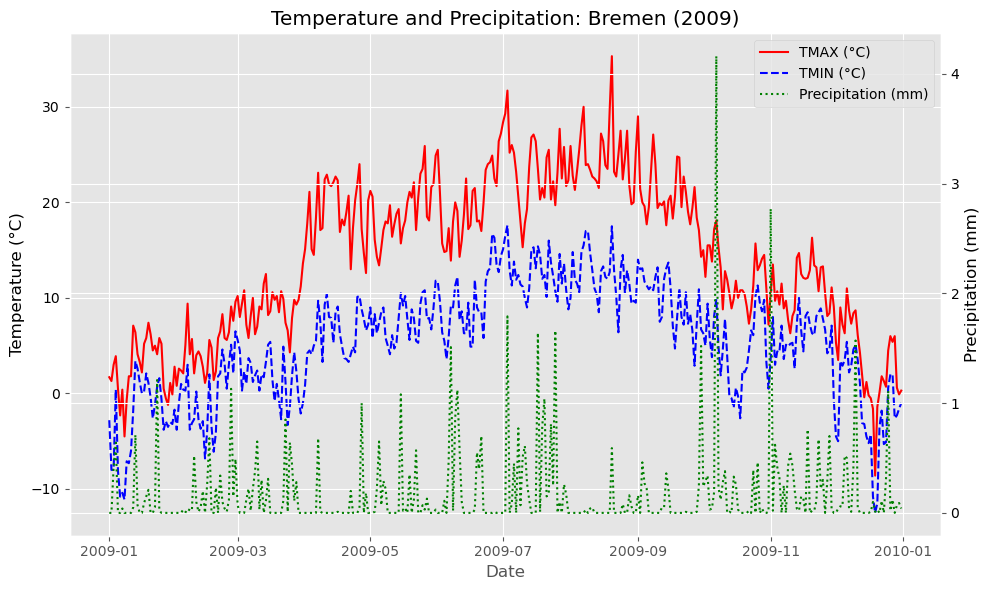

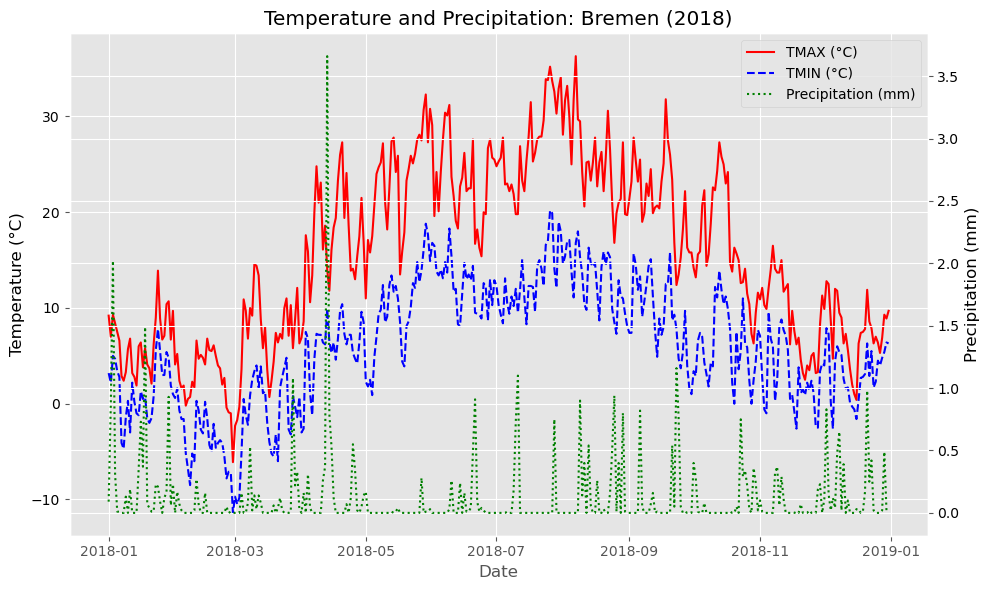

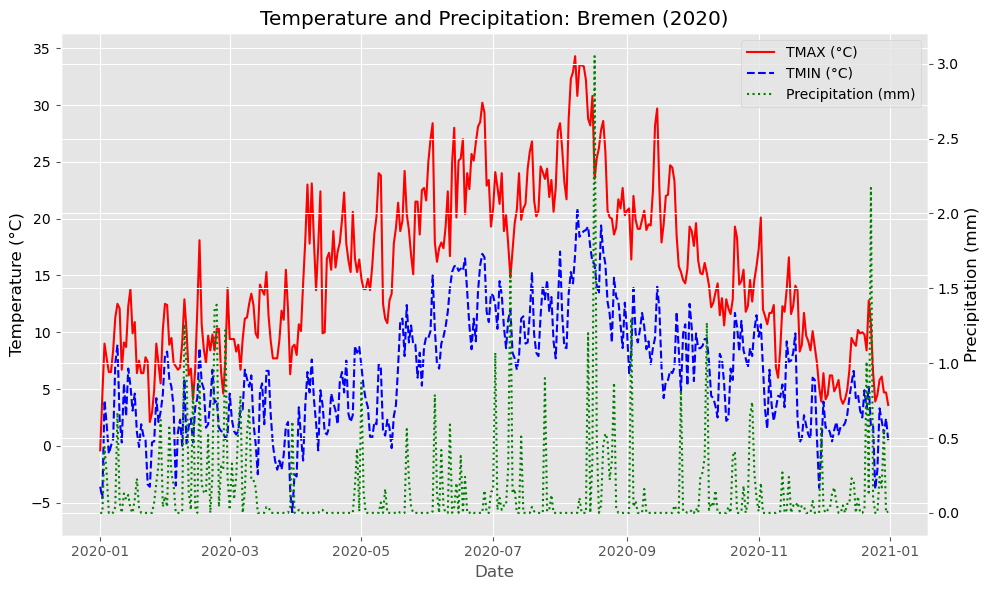

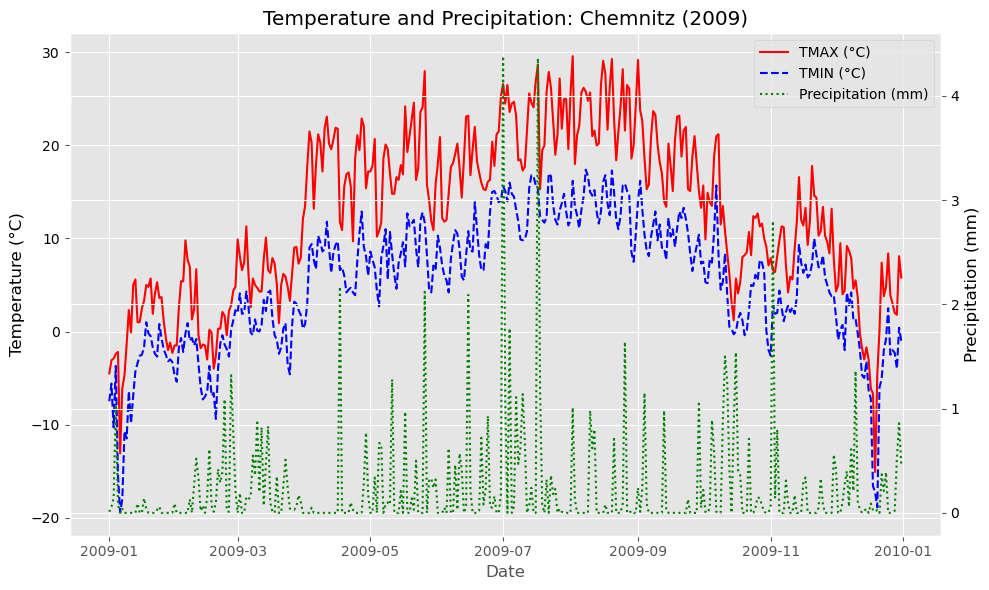

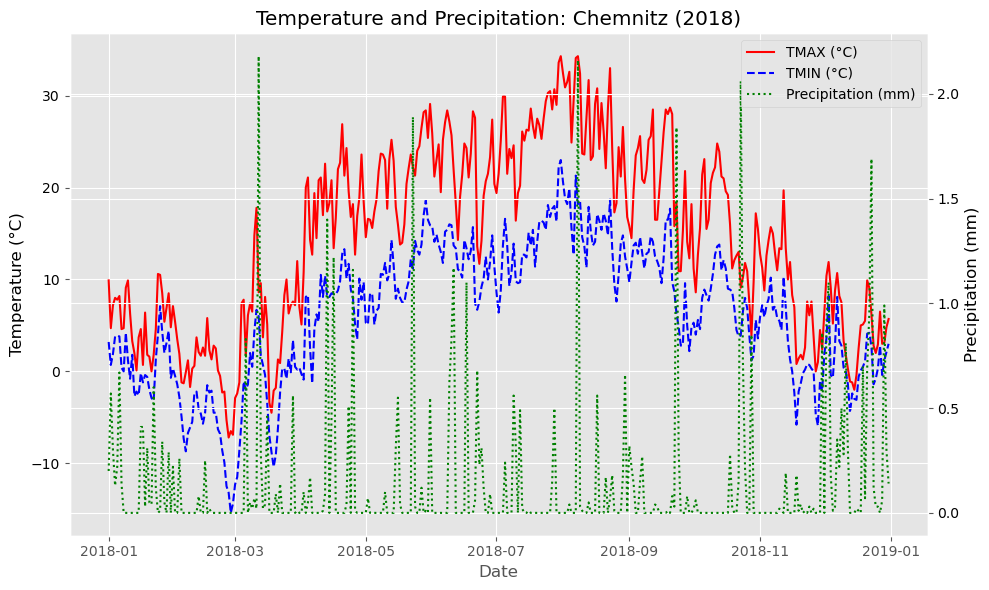

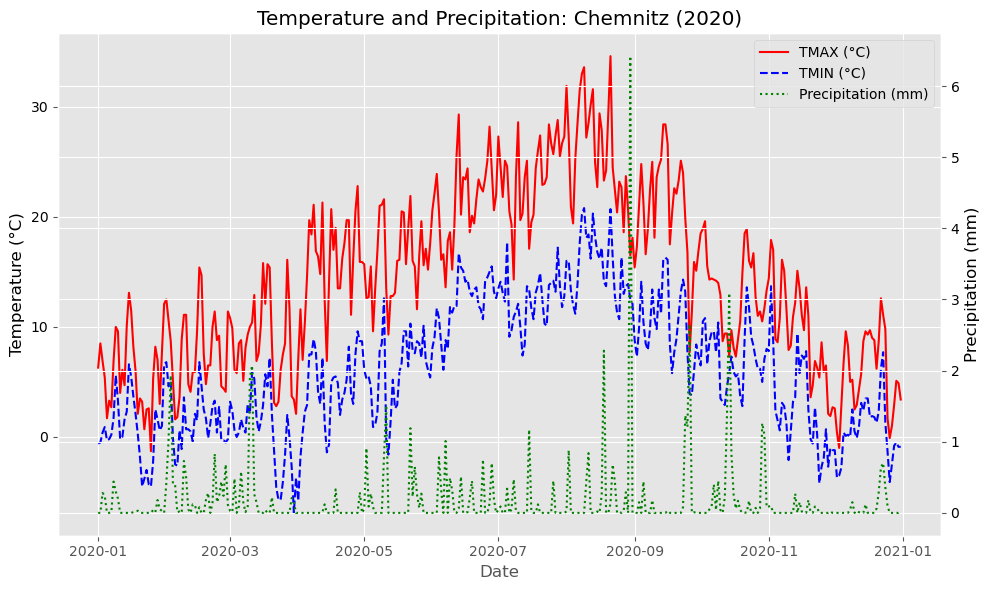

In [16]:
import matplotlib.pyplot as plt
import os

# Prepare labels for the plots
locations = ["Bremen", "Chemnitz"]
crops = ["Sweetpotato", "Wheat"]
years = ["2009", "2018", "2020"]

# Iterate through locations and years
for loc_idx, location_name in enumerate(locations):
    for year_idx, year in enumerate(years):
        # Extract the weather data for the current location and year (100% irradiance assumed)
        weather_data = weatherlist[loc_idx][0][year_idx]  # Assuming 100% irradiance (index 0)

        # Convert the weather data to a DataFrame
        df_weather = pd.DataFrame(weather_data.export())  # Export weather data to a DataFrame
        df_weather["DAY"] = pd.to_datetime(df_weather["DAY"])  # Ensure the DAY column is in datetime format
        df_weather.set_index("DAY", inplace=True)  # Set the DAY column as the index

        # Create the figure and axis
        fig, ax1 = plt.subplots(figsize=(10, 6))

        # Plot temperature (TMAX and TMIN) on the primary y-axis
        ax1.plot(df_weather.index, df_weather["TMAX"], label="TMAX (°C)", color="red", linestyle="-")
        ax1.plot(df_weather.index, df_weather["TMIN"], label="TMIN (°C)", color="blue", linestyle="--")
        ax1.set_xlabel("Date")
        ax1.set_ylabel("Temperature (°C)", color="black")
        ax1.tick_params(axis="y", labelcolor="black")

        # Create a secondary y-axis for precipitation
        ax2 = ax1.twinx()
        ax2.plot(df_weather.index, df_weather["RAIN"], label="Precipitation (mm)", color="green", linestyle=":")
        ax2.set_ylabel("Precipitation (mm)", color="black")
        ax2.tick_params(axis="y", labelcolor="black")

        # Add a title and legend
        plt.title(f"Temperature and Precipitation: {location_name} ({year})")
        fig.legend(loc="upper right", bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)

        # Save the plot
        filename = f"Temp_Precip_{location_name}_{year}.png"
        plt.tight_layout()
        plt.savefig(filename, dpi=300)
        plt.show()

### Barplots with temp and precip

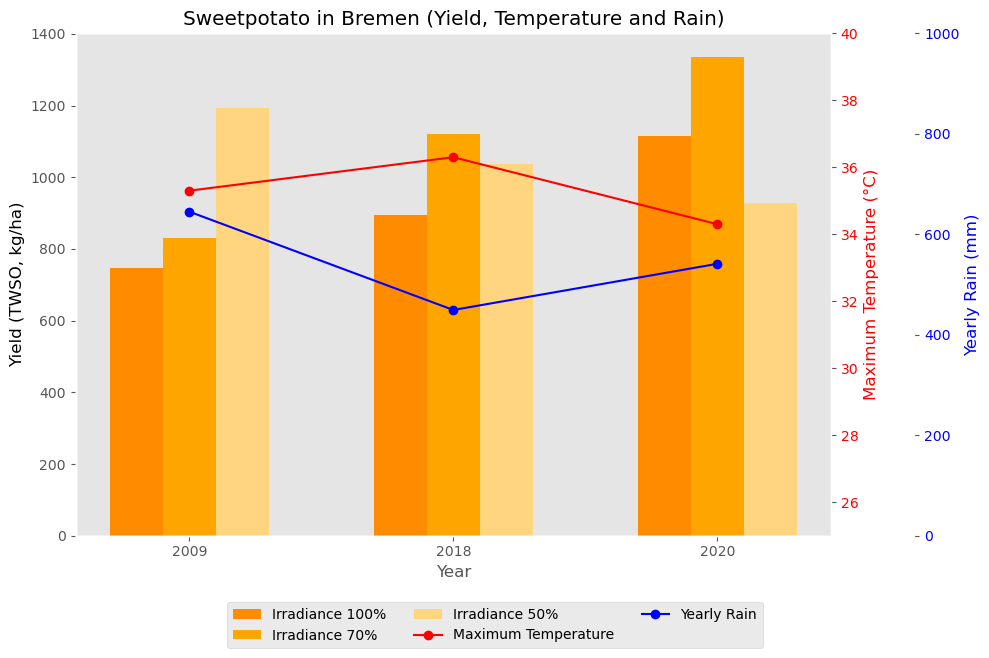

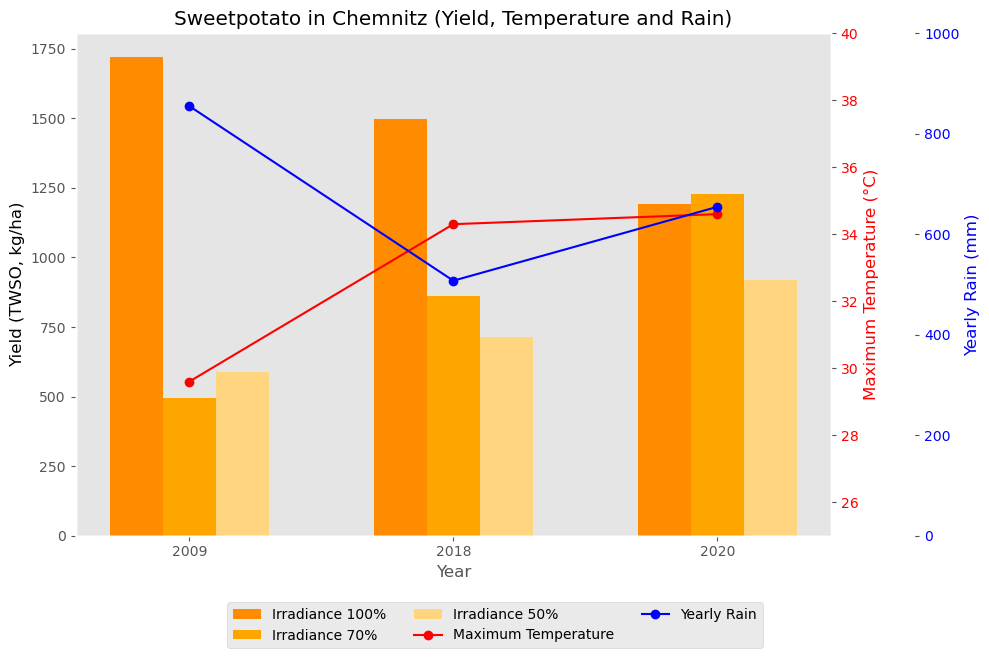

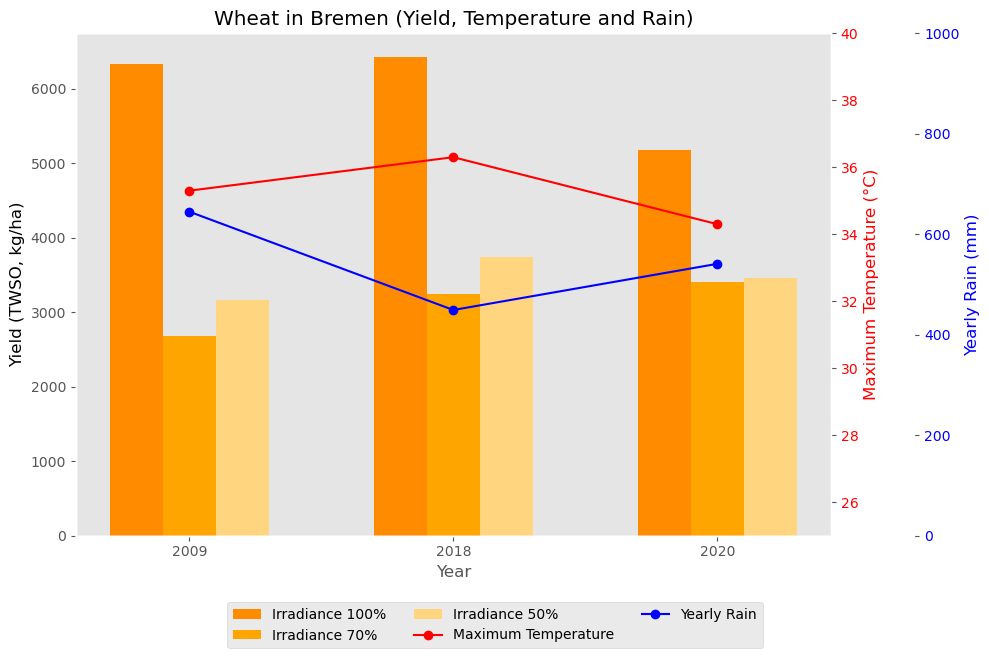

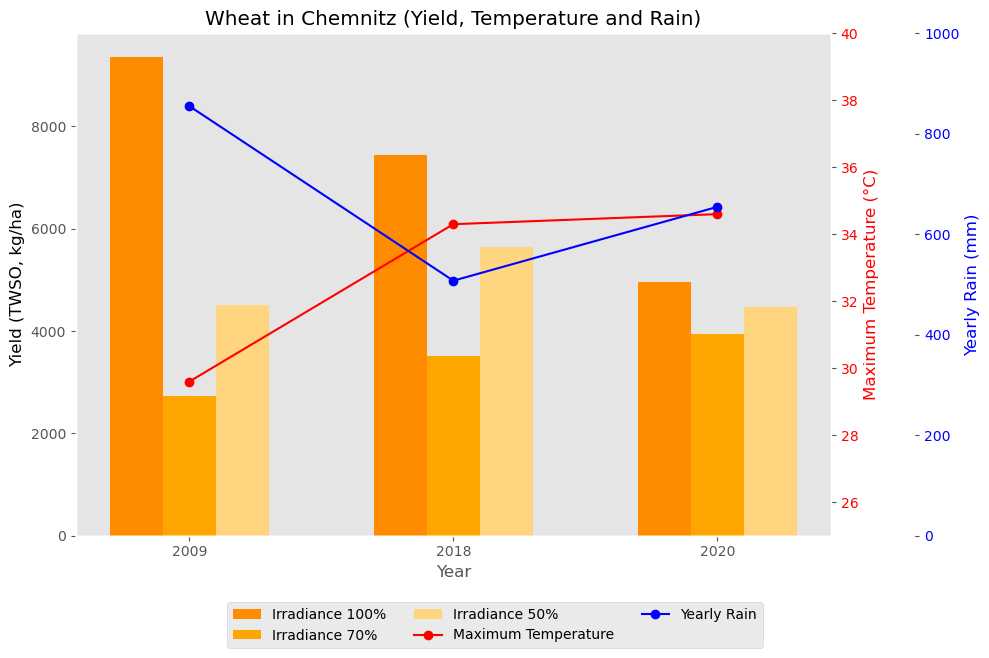

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Prepare labels for the plots
locations = ["Bremen", "Chemnitz"]
crops = ["Sweetpotato", "Wheat"]
irradiance_levels = ["100%", "70%", "50%"]
years = ["2009", "2018", "2020"]

# Define colors for the irradiance levels
#irradiance_colors = ["#FFD700", "#FFA500", "#FF4500"]  # Bright yellow to dark red
#irradiance_colors = ["#FFD700", "#FFE066", "#FFF4B2"]
irradiance_colors = ["#FF8C00", "#FFA500", "#FFD580"]


# Define consistent y-axis limits
tmax_y_limit = (25, 40)  # Temperature range in Celsius
rain_y_limit = (0, 1000)  # Rain range in mm

# Iterate through crops and locations
for crop_idx, crop_name in enumerate(crops):
    for loc_idx, location_name in enumerate(locations):
        # Prepare data for the barplot
        biomass_values = []  # Store the maximum TAGP value for each year and irradiance level
        tmax_values = []  # Store the maximum TMAX for each year
        total_rain_values = []  # Store the total precipitation for each year (converted to mm)

        for irr_idx in range(len(irradiance_levels)):
            for year_idx, year in enumerate(years):
                # Extract the DataFrame for the current crop, location, irradiance, and year
                df = wofsim_results[crop_idx][loc_idx][irr_idx][year_idx]
                # Get the maximum value of TAGP
                max_biomass = df["TWSO"].max()
                biomass_values.append(max_biomass)

                # Extract the weather data for the current location and year
                weather_data = weatherlist[loc_idx][irr_idx][year_idx]
                df_weather = pd.DataFrame(weather_data.export())
                df_weather["DAY"] = pd.to_datetime(df_weather["DAY"])
                df_weather.set_index("DAY", inplace=True)

                # Calculate the maximum TMAX and total precipitation
                max_tmax = df_weather["TMAX"].max()
                total_rain = df_weather["RAIN"].sum() * 10  # Convert cm to mm

                # Only store one value per year for TMAX and RAIN
                if irr_idx == 0:  # Only store once per year (e.g., for 100% irradiance)
                    tmax_values.append(max_tmax)
                    total_rain_values.append(total_rain)

        # Reshape the biomass values into a 2D array (years x irradiance levels)
        biomass_values = np.array(biomass_values).reshape(len(years), len(irradiance_levels))

        # Create the barplot
        fig, ax1 = plt.subplots(figsize=(10, 6))
        bar_width = 0.2
        x = np.arange(len(years))  # Positions for the years

        # Plot bars for each irradiance level
        for irr_idx, irr_label in enumerate(irradiance_levels):
            ax1.bar(x + irr_idx * bar_width, biomass_values[:, irr_idx], bar_width, 
                    label=f"Irradiance {irr_label}", color=irradiance_colors[irr_idx])

        # Add a secondary y-axis for TMAX
        ax2 = ax1.twinx()
        ax2.set_ylabel("Maximum Temperature (°C)", color="red")
        ax2.tick_params(axis="y", labelcolor="red")
        ax2.set_ylim(tmax_y_limit)  # Set consistent y-axis limits for temperature
        ax2.grid(False)  # Disable grid lines for the temperature axis

        # Add a tertiary y-axis for total precipitation
        ax3 = ax1.twinx()
        ax3.spines["right"].set_position(("outward", 60))  # Offset the third axis
        ax3.set_ylabel("Yearly Rain (mm)", color="blue")
        ax3.tick_params(axis="y", labelcolor="blue")
        ax3.set_ylim(rain_y_limit)  # Set consistent y-axis limits for precipitation
        ax3.grid(False)  # Disable grid lines for the precipitation axis

        # Plot TMAX and RAIN as connected points
        ax2.plot(x + bar_width, tmax_values, color="red", label="Maximum Temperature", marker="o", linestyle="-", zorder=5)
        ax3.plot(x + bar_width, total_rain_values, color="blue", label="Yearly Rain", marker="o", linestyle="-", zorder=5)

        # Set plot labels and title
        ax1.set_xlabel("Year")
        ax1.set_ylabel("Yield (TWSO, kg/ha)", color="black")
        ax1.set_title(f"{crop_name} in {location_name} (Yield, Temperature and Rain)")
        ax1.set_xticks(x + bar_width)
        ax1.set_xticklabels(years)
        ax1.grid(False)  # Disable grid lines for the biomass axis

        # Add legends below the graph
        fig.legend(loc="lower center", bbox_to_anchor=(0.5, -0.1), ncol=3)

        # Save the plot 
        filename = f"Barplot_Temp_Precip_{crop_name}_{location_name}.png"
        plt.tight_layout()
        plt.savefig(filename, dpi=300)
        plt.show()

### comparing the crops 

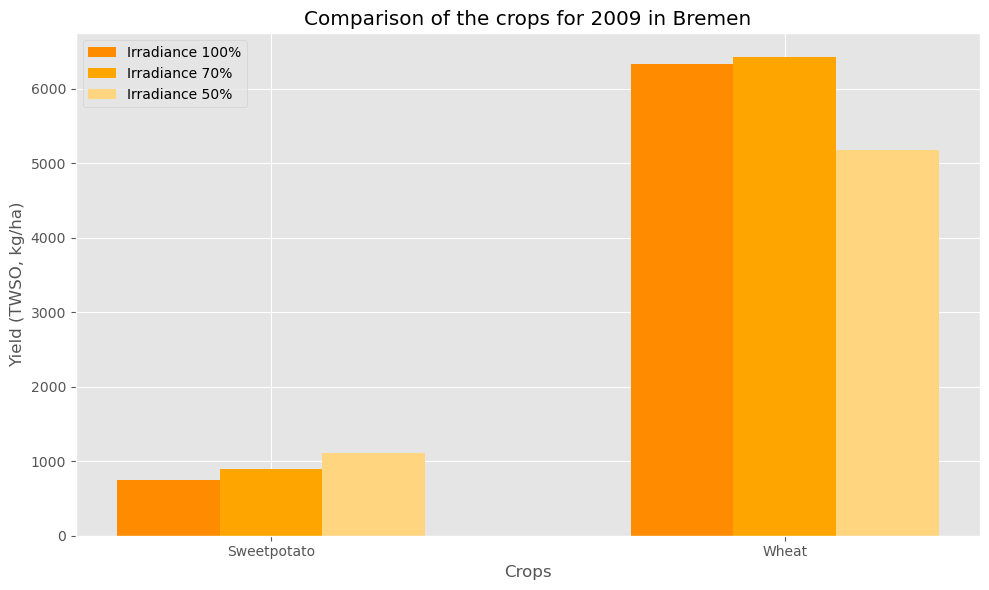

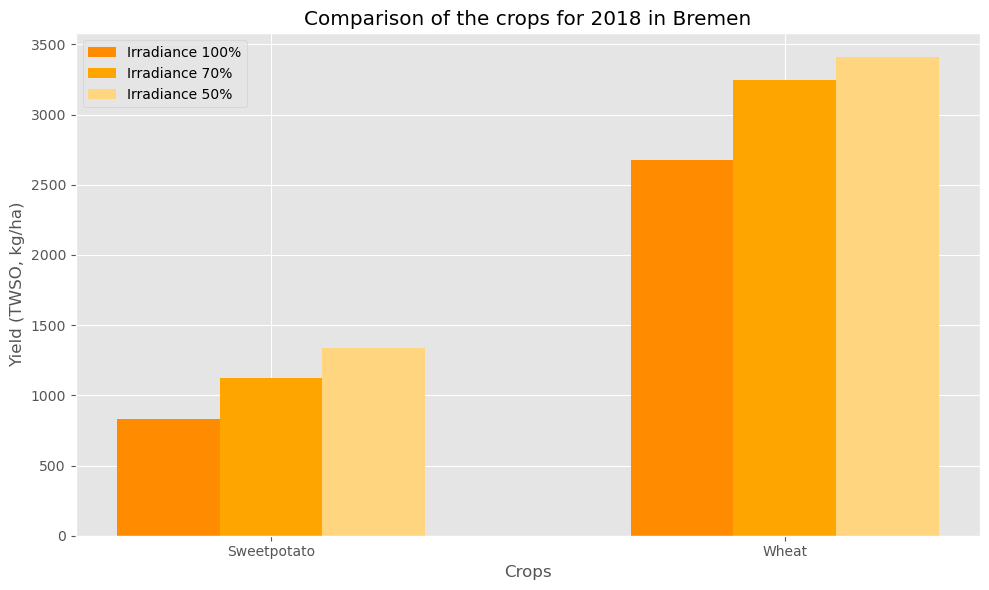

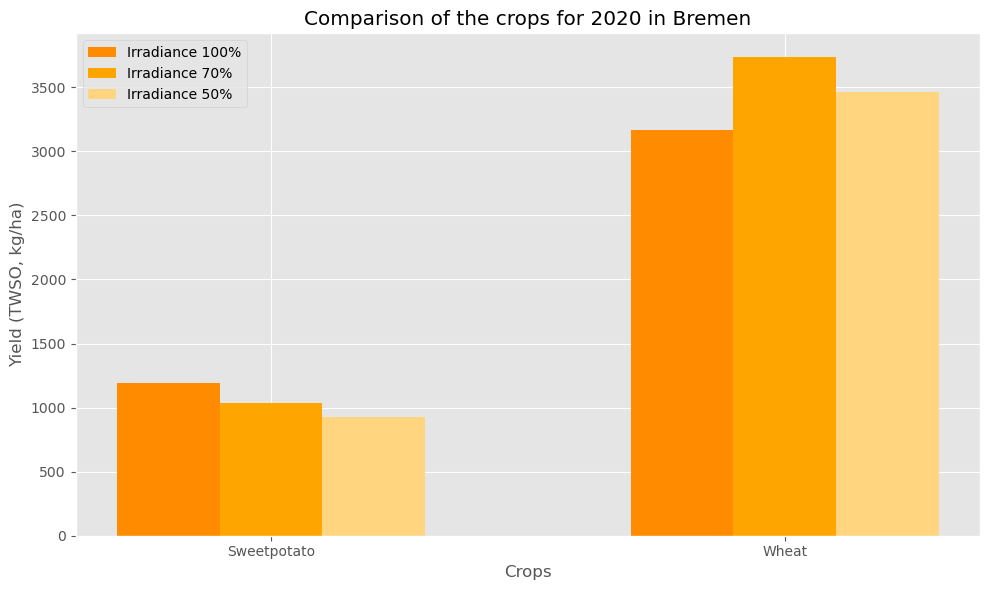

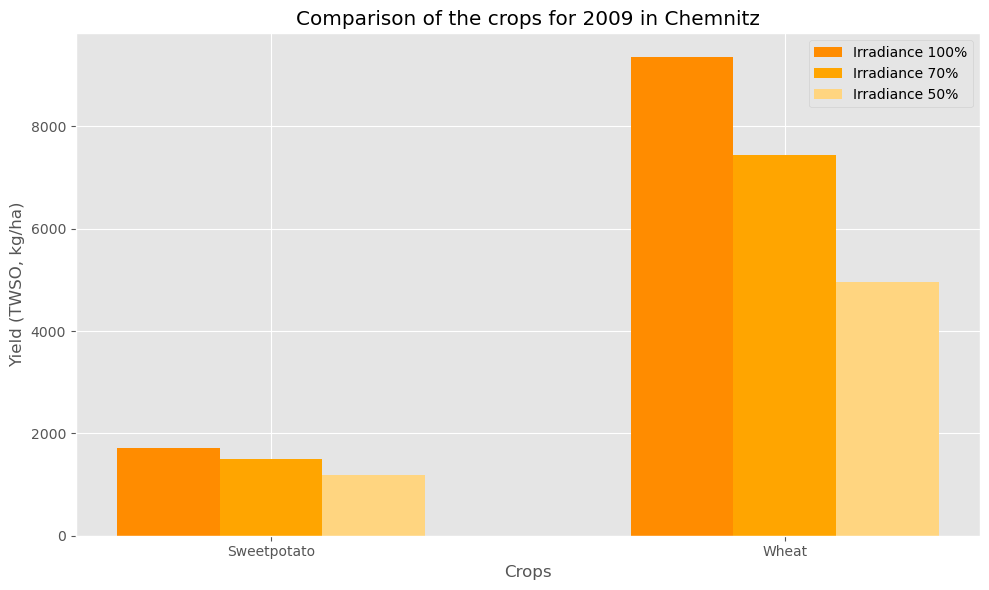

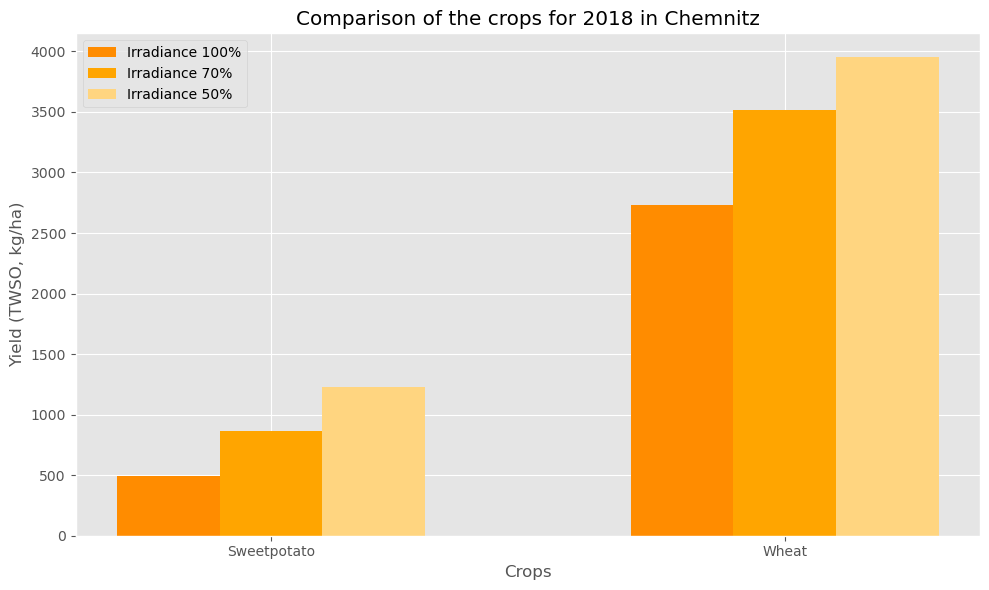

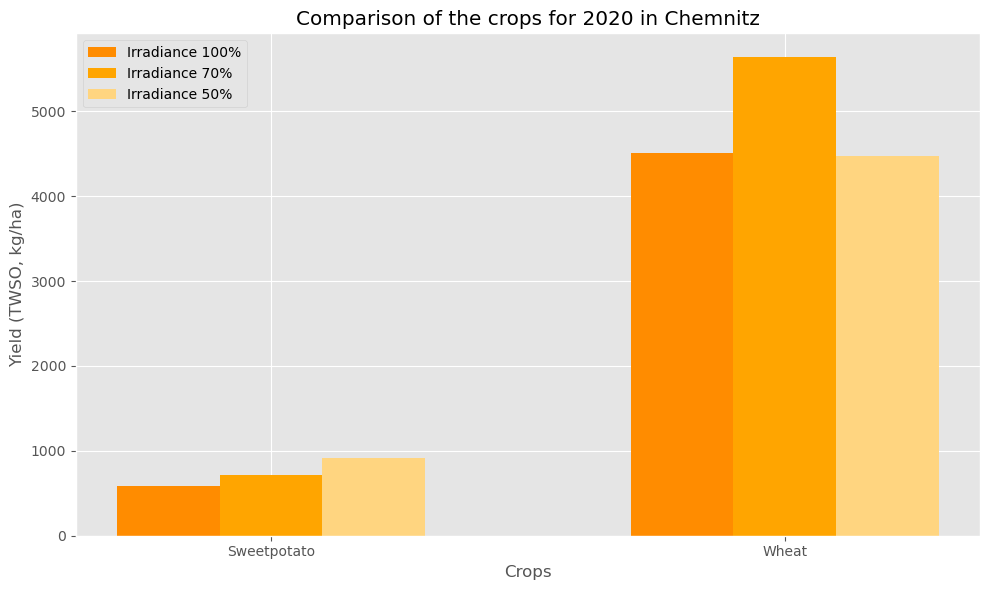

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare labels for the plots
locations = ["Bremen", "Chemnitz"]
crops = ["Sweetpotato", "Wheat"]
irradiance_levels = ["100%", "70%", "50%"]
years = ["2009", "2018", "2020"]

# Define colors for the irradiance levels
irradiance_colors = ["#FF8C00", "#FFA500", "#FFD580"]  # Strong orange to light orange

# Iterate through locations and years
for loc_idx, location_name in enumerate(locations):
    for year_idx, year in enumerate(years):
        # Prepare data for the barplot
        twso_values = []  # Store the maximum TWSO values for each crop and irradiance level

        for crop_idx, crop_name in enumerate(crops):
            crop_twso = []  # Temporary list to store TWSO for all irradiance levels
            for irr_idx, irr_label in enumerate(irradiance_levels):
                # Extract the DataFrame for the current crop, location, irradiance, and year
                df = wofsim_results[crop_idx][loc_idx][irr_idx][year_idx]
                # Get the maximum value of TWSO
                max_twso = df["TWSO"].max()
                crop_twso.append(max_twso)
            twso_values.append(crop_twso)

        # Convert TWSO values to a NumPy array for easier manipulation
        twso_values = np.array(twso_values)

        # Create the barplot
        fig, ax = plt.subplots(figsize=(10, 6))
        bar_width = 0.2
        x = np.arange(len(crops))  # Positions for the crops

        # Plot bars for each irradiance level
        for irr_idx, irr_label in enumerate(irradiance_levels):
            ax.bar(x + irr_idx * bar_width, twso_values[:, irr_idx], bar_width,
                   label=f"Irradiance {irr_label}", color=irradiance_colors[irr_idx])

        # Set plot labels and title
        ax.set_xlabel("Crops")
        ax.set_ylabel("Yield (TWSO, kg/ha)")
        ax.set_title(f"Comparison of the crops for {year} in {location_name}")
        ax.set_xticks(x + bar_width)
        ax.set_xticklabels(crops)
        ax.legend()

        # Save the plot
        filename = f"TWSO_Yield_Comparison_{location_name}_{year}.png"
        plt.tight_layout()
        plt.savefig(filename, dpi=300)
        plt.show()